In [1]:
def annual_variable_calculation_EXvolume(ds_merged, variable):      
### volume as example  ['time', 'rgi_id']
### sum RGI_id,  median,max,min,25%,50%,75% GCMs, 


    df_volume = ds_merged[f'{variable}'] 
    df_volume = df_volume.clip(0)



    df_volume_mergeRGI = df_volume.sum(dim='rgi_id', keep_attrs=True,skipna=True)
    df_volume_mergeRGI = df_volume_mergeRGI.chunk(dict(GCM=-1))  ### 优化运算的时候使

    
######################################################################################################
# 合并中位数，最大值，最小值，均值，标准差，标准误差，方差，，  25，50，75%分布  置信区间95%待定
    #### 中位数
    
    df_volume_mergeRGI_medianGCM = df_volume_mergeRGI.median(dim='GCM', keep_attrs=True,skipna=True)  # 求12个gcm里面的中位数
    df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM.rename(f'{variable}_medianGCMs')
    # df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM[['scenario', 'time', 'volume_medianGCMs']]  ###把xarray转为datframe且只选择这三个量
    

    #### 均值
    df_volume_mergeRGI_meanGCM = df_volume_mergeRGI.mean(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
    df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM.rename(f'{variable}_meanGCMs')
    # df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM[['scenario', 'time', 'volume_meanGCMs']]  ###把xarray转为datframe且只选择这三个量
    
    #### 标准差（Standard Deviation）:
    df_volume_mergeRGI_stdGCM = df_volume_mergeRGI.std(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
    df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM.rename(f'{variable}_stdGCMs')
    # df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM[['scenario', 'time', 'volume_stdGCMs']]  ###把xarray转为datframe且只选择这三个量
    

    # #### 标准误差（Standard Error）:
    std_dev = df_volume_mergeRGI.std(dim='GCM', skipna=True)
    n = df_volume_mergeRGI.count(dim='GCM')
    df_volume_mergeRGI_seGCM = std_dev / np.sqrt(n)
    df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM.rename(f'{variable}_seGCMs')
    # df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM[['scenario', 'time', 'volume_meanGCMs']]  ###把xarray转为datframe且只选择这三个量

    #### 方差（Variance）
    df_volume_mergeRGI_varGCM = df_volume_mergeRGI.var(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
    df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM.rename(f'{variable}_varGCMs')
    # df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM[['scenario', 'time', 'volume_varGCMs']]  ###把xarray转为datframe且只选择这三个量
    
    #### 置信区间（Confidence Interval）

    from scipy import stats
    # 假设 df_volume_mergeRGI 是一个 xarray DataArray
    mean = df_volume_mergeRGI.mean(dim='GCM', skipna=True)
    std_dev = df_volume_mergeRGI.std(dim='GCM', skipna=True)
    n = df_volume_mergeRGI.count(dim='GCM')
    dof = n - 1
    t_stat = stats.t.ppf(0.975, dof)
    std_err = std_dev / np.sqrt(n)

    # 为置信区间的下界创建一个 Dataset
    df_volume_mergeRGI_ci95lowerGCM = xr.Dataset({
    'lower_bound': mean - t_stat * std_err
    }).lower_bound
    df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM.rename(f'{variable}_ci95lowerGCMs')
    # df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM[['scenario', 'time', 'volume_ci95lowerGCMs']]  ###把xarray转为datframe且只选择这三个量

    # 为置信区间的上界创建一个 Dataset
    df_volume_mergeRGI_ci95upperGCM = xr.Dataset({
    'upper_bound': mean + t_stat * std_err
    }).upper_bound
    df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM.rename(f'{variable}_ci95upperGCMs')
    # df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM[['scenario', 'time', 'volume_ci95upperGCMs']]  ###把xarray转为datframe且只选择这三个量
    
    
    #### 最小值
    # estimate the minimum volume for each time step and scenario over the GCMs
    df_volume_mergeRGI_minGCM = df_volume_mergeRGI.min(dim='GCM', keep_attrs=True,skipna=True)
    df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM.rename(f'{variable}_minGCMs')
    # df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM[['scenario', 'time', 'volume_minGCMs']]  ###只选择这三个量
    
    #### 最大值
    # estimate the maximum volume for each time step and scenario over the GCMs
    df_volume_mergeRGI_maxGCM = df_volume_mergeRGI.max(dim='GCM', keep_attrs=True,skipna=True)
    df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM.rename(f'{variable}_maxGCMs')
    # df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM[['scenario', 'time', 'volume_maxGCMs']]  ###只选择这三个量
    


    #### 25%分布
    # estimate the 25th percentile volume for each time step and scenario over the GCMs
    df_volume_mergeRGI_p25GCM = df_volume_mergeRGI.quantile(0.25, dim='GCM', keep_attrs=True,skipna=True)
    df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.drop_vars('quantile')
    df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.rename(f'{variable}_p25GCMs')
    # df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM[['scenario', 'time', 'volume_p25GCMs']]  ###只选择这三个量
    #### 50%分布
    # estimate the 50th percentile volume for each time step and scenario over the GCMs
    df_volume_mergeRGI_p50GCM = df_volume_mergeRGI.quantile(0.5, dim='GCM', keep_attrs=True,skipna=True)
    df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.drop_vars('quantile')
    df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.rename(f'{variable}_p50GCMs')
    # df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM[['scenario', 'time', 'volume_p50GCMs']]  ###只选择这三个量
    
    #### 75%分布
    # estimate the 75th percentile volume for each time step and scenario over the GCMs
    df_volume_mergeRGI_p75GCM = df_volume_mergeRGI.quantile(0.75, dim='GCM', keep_attrs=True,skipna=True)
    df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.drop_vars('quantile')
    df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.rename(f'{variable}_p75GCMs')
    # df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
    # df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM[['scenario', 'time', 'volume_p75GCMs']]  ###只选择这三个量
    

    # ################ 合并这些变量在一个里面
    # # 合并
    df_volume_mergeRGI_mergedGCMS= xr.merge([df_volume_mergeRGI_medianGCM, 
                                            df_volume_mergeRGI_meanGCM, 
                                            df_volume_mergeRGI_stdGCM, 
                                            df_volume_mergeRGI_seGCM, 
                                            df_volume_mergeRGI_varGCM, 
                                            df_volume_mergeRGI_ci95lowerGCM, 
                                            df_volume_mergeRGI_ci95upperGCM,
                                            df_volume_mergeRGI_minGCM, 
                                            df_volume_mergeRGI_maxGCM, 
                                            df_volume_mergeRGI_p25GCM,
                                            df_volume_mergeRGI_p50GCM,
                                            df_volume_mergeRGI_p75GCM,
                                            ])

                                            
    # # 把xarray转换为dataframe
    dff_volume_mergeRGI_mergedGCMS = df_volume_mergeRGI_mergedGCMS.to_dataframe().reset_index()  
    index_list = dff_volume_mergeRGI_mergedGCMS.columns.to_list()
    index_list_timeandscenario = index_list[0:2]
    index_list_variable =  index_list[6:]
    index_list_new = index_list[0:2] + index_list[6:]
    dff_volume_mergeRGI_mergedGCMS = dff_volume_mergeRGI_mergedGCMS[index_list_new]  ###只选择这三个量 
    dff_volume_mergeRGI_mergedGCMS_privot = dff_volume_mergeRGI_mergedGCMS.pivot(index='time', columns='SCENARIO', values=index_list_variable)  ###把已经构建的dafaframe构造为所需格式
    dff_volume_mergeRGI_mergedGCMS_privot = dff_volume_mergeRGI_mergedGCMS_privot.reorder_levels([1, 0], axis=1)  ### 按照先ssp再volume
    dff_volume_mergeRGI_mergedGCMS_privot_sort = dff_volume_mergeRGI_mergedGCMS_privot.sort_index(level='SCENARIO', axis=1)

    return dff_volume_mergeRGI_mergedGCMS_privot_sort

In [2]:
def annual_variable_calculation_runoff(ds_runoff):      
### runoff  ['time', 'rgi_id']
### sum RGI_id,  median,max,min,25%,50%,75% GCMs, 


    ds_runoff = ds_runoff.isel(time=slice(0,-1))
    ds_runoff = ds_runoff.clip(0)

    ## 求和所有rgi_id
    ds_runoff_mergeRGI = ds_runoff.sum(dim='rgi_id', keep_attrs=True,skipna=True)

    ds_runoff_mergeRGI = ds_runoff_mergeRGI.chunk(dict(GCM=-1))  ### 优化运算的时候使

    ###### for 4 runoff components stack figure figure
    ## 求GCM的中位数，以及各个占比 

    # ds_runoff_mergeRGI_medianGCM = ds_runoff_mergeRGI.median(dim='gcm', keep_attrs=True,skipna=True)

    ## 求和得移动径流和固定径流
    df_runoff_mergeRGI_FixedGaugeStation = ds_runoff_mergeRGI['melt_off_glacier'] + ds_runoff_mergeRGI['melt_on_glacier'] + ds_runoff_mergeRGI['liq_prcp_off_glacier'] + ds_runoff_mergeRGI['liq_prcp_on_glacier']
    df_runoff_mergeRGI_MovingGaugeStation = ds_runoff_mergeRGI['melt_on_glacier'] + ds_runoff_mergeRGI['liq_prcp_on_glacier']

    fixed_and_moving = ['runoff_mergeRGI_FixedGaugeStation', 'runoff_mergeRGI_MovingGaugeStation']
    df_volume_mergeRGI_mergedGCMS_fixed_moving = xr.Dataset()
    for variable in fixed_and_moving:

        ###################################################################################################### 'runoff_mergeRGI_FixedGaugeStation_stdGCMs'
        if variable == 'runoff_mergeRGI_FixedGaugeStation':

            df_runoff_mergeRGI_FixedGaugeStation = df_runoff_mergeRGI_FixedGaugeStation.rename(f'{variable}_stdGCMs')
            df_volume_mergeRGI = df_runoff_mergeRGI_FixedGaugeStation

        else:
            df_runoff_mergeRGI_MovingGaugeStation = df_runoff_mergeRGI_MovingGaugeStation.rename(f'{variable}_stdGCMs')
            df_volume_mergeRGI = df_runoff_mergeRGI_MovingGaugeStation     

        ######################################################################################################
        # 合并中位数，最大值，最小值，均值，标准差，标准误差，方差，，  25，50，75%分布  置信区间95%待定

        #### 中位数
        df_volume_mergeRGI_medianGCM = df_volume_mergeRGI.median(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
        df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM.rename(f'{variable}_medianGCMs')
        # df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_medianGCM = df_volume_mergeRGI_medianGCM[['scenario', 'time', 'volume_medianGCMs']]  ###把xarray转为datframe且只选择这三个量


        #### 均值
        df_volume_mergeRGI_meanGCM = df_volume_mergeRGI.mean(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
        df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM.rename(f'{variable}_meanGCMs')
        # df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_meanGCM = df_volume_mergeRGI_meanGCM[['scenario', 'time', 'volume_meanGCMs']]  ###把xarray转为datframe且只选择这三个量

        #### 标准差（Standard Deviation）:
        df_volume_mergeRGI_stdGCM = df_volume_mergeRGI.std(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
        df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM.rename(f'{variable}_stdGCMs')
        # df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_stdGCM = df_volume_mergeRGI_stdGCM[['scenario', 'time', 'volume_stdGCMs']]  ###把xarray转为datframe且只选择这三个量


        # #### 标准误差（Standard Error）:
        std_dev = df_volume_mergeRGI.std(dim='GCM', skipna=True)
        n = df_volume_mergeRGI.count(dim='GCM')
        df_volume_mergeRGI_seGCM = std_dev / np.sqrt(n)
        df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM.rename(f'{variable}_seGCMs')
        # df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_seGCM = df_volume_mergeRGI_seGCM[['scenario', 'time', 'volume_meanGCMs']]  ###把xarray转为datframe且只选择这三个量

        #### 方差（Variance）
        df_volume_mergeRGI_varGCM = df_volume_mergeRGI.var(dim='GCM', keep_attrs=True,skipna=True) # 求12个gcm里面的中位数
        df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM.rename(f'{variable}_varGCMs')
        # df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_varGCM = df_volume_mergeRGI_varGCM[['scenario', 'time', 'volume_varGCMs']]  ###把xarray转为datframe且只选择这三个量

        #### 置信区间（Confidence Interval）

        from scipy import stats
        # 假设 df_volume_mergeRGI 是一个 xarray DataArray
        mean = df_volume_mergeRGI.mean(dim='GCM', skipna=True)
        std_dev = df_volume_mergeRGI.std(dim='GCM', skipna=True)
        n = df_volume_mergeRGI.count(dim='GCM')
        dof = n - 1
        t_stat = stats.t.ppf(0.975, dof)
        std_err = std_dev / np.sqrt(n)

        # 为置信区间的下界创建一个 Dataset
        df_volume_mergeRGI_ci95lowerGCM = xr.Dataset({
        'lower_bound': mean - t_stat * std_err
        }).lower_bound
        df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM.rename(f'{variable}_ci95lowerGCMs')
        # df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_ci95lowerGCM = df_volume_mergeRGI_ci95lowerGCM[['scenario', 'time', 'volume_ci95lowerGCMs']]  ###把xarray转为datframe且只选择这三个量

        # 为置信区间的上界创建一个 Dataset
        df_volume_mergeRGI_ci95upperGCM = xr.Dataset({
        'upper_bound': mean + t_stat * std_err
        }).upper_bound
        df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM.rename(f'{variable}_ci95upperGCMs')
        # df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_ci95upperGCM = df_volume_mergeRGI_ci95upperGCM[['scenario', 'time', 'volume_ci95upperGCMs']]  ###把xarray转为datframe且只选择这三个量


        #### 最小值
        # estimate the minimum volume for each time step and scenario over the GCMs
        df_volume_mergeRGI_minGCM = df_volume_mergeRGI.min(dim='GCM', keep_attrs=True,skipna=True)
        df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM.rename(f'{variable}_minGCMs')
        # df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_minGCM = df_volume_mergeRGI_minGCM[['scenario', 'time', 'volume_minGCMs']]  ###只选择这三个量

        #### 最大值
        # estimate the maximum volume for each time step and scenario over the GCMs
        df_volume_mergeRGI_maxGCM = df_volume_mergeRGI.max(dim='GCM', keep_attrs=True,skipna=True)
        df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM.rename(f'{variable}_maxGCMs')
        # df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_maxGCM = df_volume_mergeRGI_maxGCM[['scenario', 'time', 'volume_maxGCMs']]  ###只选择这三个量



        #### 25%分布
        # estimate the 25th percentile volume for each time step and scenario over the GCMs
        df_volume_mergeRGI_p25GCM = df_volume_mergeRGI.quantile(0.25, dim='GCM', keep_attrs=True,skipna=True)
        df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.drop_vars('quantile')
        df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.rename(f'{variable}_p25GCMs')
        # df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_p25GCM = df_volume_mergeRGI_p25GCM[['scenario', 'time', 'volume_p25GCMs']]  ###只选择这三个量
        #### 50%分布
        # estimate the 50th percentile volume for each time step and scenario over the GCMs
        df_volume_mergeRGI_p50GCM = df_volume_mergeRGI.quantile(0.5, dim='GCM', keep_attrs=True,skipna=True)
        df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.drop_vars('quantile')
        df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.rename(f'{variable}_p50GCMs')
        # df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_p50GCM = df_volume_mergeRGI_p50GCM[['scenario', 'time', 'volume_p50GCMs']]  ###只选择这三个量

        #### 75%分布
        # estimate the 75th percentile volume for each time step and scenario over the GCMs
        df_volume_mergeRGI_p75GCM = df_volume_mergeRGI.quantile(0.75, dim='GCM', keep_attrs=True,skipna=True)
        df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.drop_vars('quantile')
        df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.rename(f'{variable}_p75GCMs')
        # df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM.to_dataframe().reset_index()    ### 把xarray转为datframe
        # df_volume_mergeRGI_p75GCM = df_volume_mergeRGI_p75GCM[['scenario', 'time', 'volume_p75GCMs']]  ###只选择这三个量






        # ################ 合并这些变量在一个里面
        # # 合并
        df_volume_mergeRGI_mergedGCMS= xr.merge([df_volume_mergeRGI_medianGCM, 
                                                df_volume_mergeRGI_meanGCM, 
                                                df_volume_mergeRGI_stdGCM, 
                                                df_volume_mergeRGI_seGCM, 
                                                df_volume_mergeRGI_varGCM, 
                                                df_volume_mergeRGI_ci95lowerGCM, 
                                                df_volume_mergeRGI_ci95upperGCM,
                                                df_volume_mergeRGI_minGCM, 
                                                df_volume_mergeRGI_maxGCM, 
                                                df_volume_mergeRGI_p25GCM,
                                                df_volume_mergeRGI_p50GCM,
                                                df_volume_mergeRGI_p75GCM,
                                                ])

        df_volume_mergeRGI_mergedGCMS_fixed_moving =      xr.merge([df_volume_mergeRGI_mergedGCMS_fixed_moving, 
                                                df_volume_mergeRGI_mergedGCMS, 
                                                ])


    # # 把xarray转换为dataframe
    df_volume_mergeRGI_mergedGCMS =  df_volume_mergeRGI_mergedGCMS_fixed_moving
    dff_volume_mergeRGI_mergedGCMS = df_volume_mergeRGI_mergedGCMS.to_dataframe().reset_index()  
    index_list = dff_volume_mergeRGI_mergedGCMS.columns.to_list()
    index_list_timeandscenario = index_list[0:2]
    index_list_variable =  index_list[6:]
    index_list_new = index_list[0:2] + index_list[6:]
    dff_volume_mergeRGI_mergedGCMS = dff_volume_mergeRGI_mergedGCMS[index_list_new]  ###只选择这三个量 
    dff_volume_mergeRGI_mergedGCMS_privot = dff_volume_mergeRGI_mergedGCMS.pivot(index='time', columns='SCENARIO', values=index_list_variable)  ###把已经构建的dafaframe构造为所需格式
    dff_volume_mergeRGI_mergedGCMS_privot = dff_volume_mergeRGI_mergedGCMS_privot.reorder_levels([1, 0], axis=1)  ### 按照先ssp再volume
    dff_volume_mergeRGI_mergedGCMS_privot_sort = dff_volume_mergeRGI_mergedGCMS_privot.sort_index(level='SCENARIO', axis=1)

    return dff_volume_mergeRGI_mergedGCMS_privot_sort

In [ ]:
#import os
import logging 
import sys

# Libs
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Libs
from time import gmtime, strftime
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
# Locals
from oggm import utils, workflow, tasks
import oggm.cfg as cfg
from oggm.shop import gcm_climate
from oggm.exceptions import InvalidParamsError
from oggm.shop.gcm_climate import process_monthly_isimip_data, process_cmip_data
from oggm.core import massbalance
from oggm.core.massbalance import mb_calibration_from_scalar_mb, mb_calibration_from_geodetic_mb, mb_calibration_from_wgms_mb
# Locals

from oggm import DEFAULT_BASE_URL
from oggm.exceptions import InvalidParamsError
from oggm.shop.gcm_climate import process_monthly_isimip_data, process_cmip_data


### get all glacier in RGI13 14 15

### HMA shpfiles
pd_basin_num = gpd.read_file('/home/dcl/data/HMA_River_basin_shpfile/Glacierized river basin boundary dataset in China and surrounding areas/Glacierized river basin boundary dataset in China and surrounding areas/Glacierized_macroscale_river_basin_data_across_High_Mountain_Asia.shp')
shpfiles = [
            'Amu_Darya',
            'Brahmaputra',
            "Ganges",
            "Hexi",
            "Indus",
            "Irrawaddy",
            "Irtysh_River(unique)",
            "Junggar",
            "Lake_Balkash",
            "Mekong",
            "Qaidam",
            "Qiangtang",
            "Salween",
            "Syr_Darya",
            "Tarim",
            "Turpan-Hami",
            "Yangtze",
            "Yellow_river",
                            ]

### 获得RGI 13 14 15 的合并数据
cfg.initialize(logging_level='WARNING')

# change border around the individual glaciers
cfg.PARAMS['border'] = 160

# Use Multiprocessing
cfg.PARAMS['use_multiprocessing'] = True

cfg.PARAMS['continue_on_error'] = True

# For hydro output
cfg.PARAMS['store_model_geometry'] = True




2024-12-06 18:41:30: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-12-06 18:41:30: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-12-06 18:41:30: oggm.cfg: Multiprocessing: using all available processors (N=22)
2024-12-06 18:41:31: oggm.cfg: PARAMS['border'] changed from `80` to `160`.
2024-12-06 18:41:31: oggm.cfg: Multiprocessing switched ON after user settings.
2024-12-06 18:41:31: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2024-12-06 18:41:31: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.


2024-12-06 18:41:38: oggm.workflow: init_glacier_directories from prepro level 2 on 1 glaciers.
2024-12-06 18:41:38: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-12-06 18:41:38: oggm.workflow: Execute entity tasks [process_climate_data] on 1 glaciers


<xarray.Dataset> Size: 29kB
Dimensions:   (time: 1428)
Coordinates:
  * time      (time) datetime64[ns] 11kB 1901-01-01 1901-02-01 ... 2019-12-01
Data variables:
    prcp      (time) float32 6kB 218.9 114.7 306.9 467.6 ... 274.7 335.7 248.0
    temp      (time) float32 6kB -6.713 -9.787 -4.247 0.9586 ... 6.9 0.4 -0.5
    temp_std  (time) float32 6kB 3.851 5.846 3.319 3.31 ... 1.858 3.024 2.511
Attributes:
    ref_hgt:         1764.0
    ref_pix_lon:     8.25
    ref_pix_lat:     46.75
    ref_pix_dis:     32652.873631988525
    climate_source:  GSWP3_W5E5
    yr_0:            1901
    yr_1:            2019
    author:          OGGM
    author_info:     Open Global Glacier Model
Delete all glacier directories? [Y/n] 

2024-12-06 18:41:48: oggm.workflow: init_glacier_directories from prepro level 2 on 1 glaciers.
2024-12-06 18:41:48: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-12-06 18:41:49: oggm.cfg: PARAMS['baseline_climate'] changed from `GSWP3_W5E5` to `ERA5L-HMA`.
2024-12-06 18:41:49: oggm.workflow: Execute entity tasks [process_climate_data] on 1 glaciers


<xarray.Dataset> Size: 14kB
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2020-12-01
Data variables:
    prcp     (time) float32 3kB 8.83 45.5 42.7 16.82 ... 212.3 183.3 28.4 2.458
    temp     (time) float32 3kB -0.9858 -0.04809 3.612 ... 9.164 3.991 0.7734
Attributes:
    ref_hgt:         3442.942783408358
    ref_pix_lon:     100.19999694824219
    ref_pix_lat:     27.100000381469727
    ref_pix_dis:     1361.2103802222678
    climate_source:  ERA5L-HMA
    yr_0:            1950
    yr_1:            2020
    author:          OGGM
    author_info:     Open Global Glacier Model


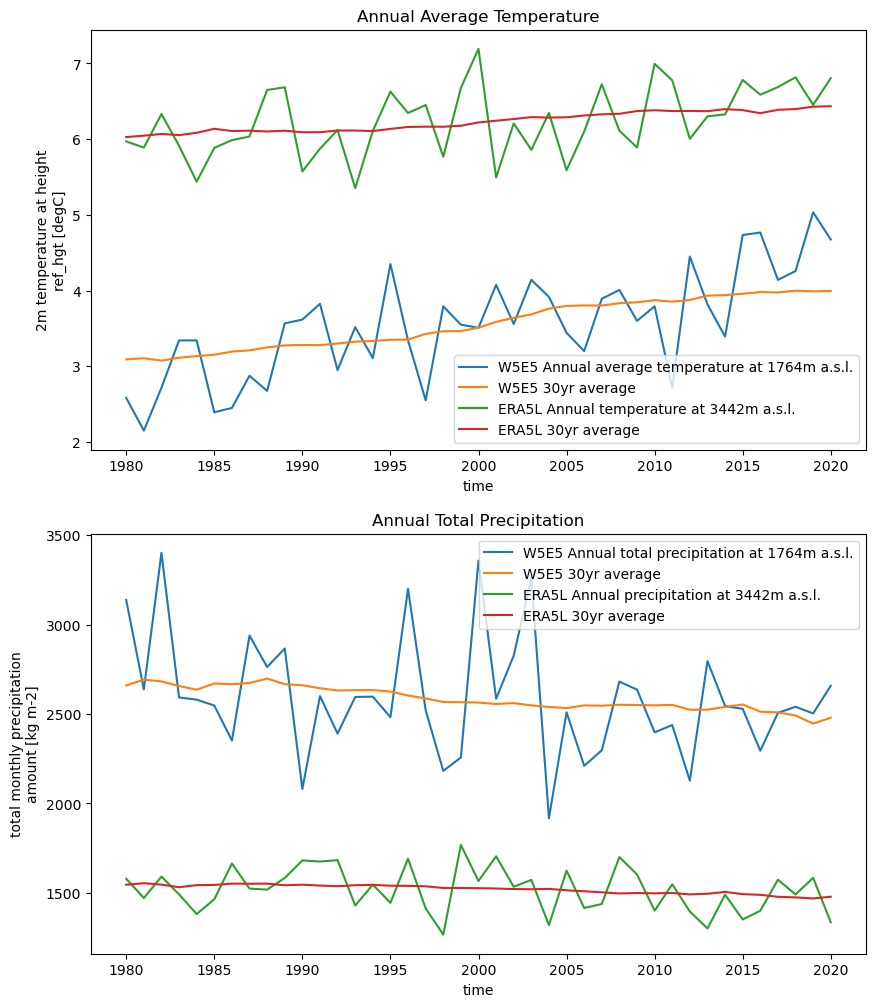

In [4]:
############################## compare W5E5 and ERA5L

## W5E5
rgi_ids = 'RGI60-11.01450'
# rgi_ids =  'RGI60-13.24556'



                                                                                
path = utils.mkdir('/home/dcl/OGGM_pre-process_directory/Aletsch glacier W5E5')            ###################
cfg.PATHS['working_dir'] = path

prepro_base_url_L2 = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/'

gdirs_W5E5 = workflow.init_glacier_directories(rgi_ids, from_prepro_level=2, prepro_base_url=prepro_base_url_L2,
                                                                                reset = True,
                                                                                force = True,
                                                                                )

# define the climate data to use, we keep the default
cfg.PARAMS['baseline_climate'] = 'GSWP3_W5E5'

# add climate data to gdir
workflow.execute_entity_task(tasks.process_climate_data, gdirs_W5E5);


import xarray as xr
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


# Open the file using xarray
with xr.open_dataset(gdirs_W5E5[0].get_filepath('climate_historical')) as ds:
    ds = ds.load()
    
# Plot the data
## temperature
ds_1979_2020 = ds.sel(time=slice('1979-01-01', '2019-12-01'))
ds_1979_2020.temp.resample(time='YE').mean().plot(ax=ax1, label=f'W5E5 Annual average temperature at {int(ds_1979_2020.ref_hgt)}m a.s.l.');
ds_1979_2020.temp.resample(time='YE').mean().rolling(time=31, center=True, min_periods=15).mean().plot(ax=ax1, label='W5E5 30yr average');
ax1.legend();

##precipitation
ds_1979_2020 = ds.sel(time=slice('1979-01-01', '2019-12-01'))
ds_1979_2020.prcp.resample(time='YE').sum().plot(ax=ax2, label=f'W5E5 Annual total precipitation at {int(ds_1979_2020.ref_hgt)}m a.s.l.');
ds_1979_2020.prcp.resample(time='YE').sum().rolling(time=31, center=True, min_periods=15).mean().plot(ax=ax2, label='W5E5 30yr average');
ax2.legend();



ds_W5E5 = ds
ds_W5E5 = ds_W5E5.sel(time=slice('1979-01-01', '2019-12-01'))
ds_W5E5 = ds_W5E5.to_pandas().reset_index()
ds_W5E5.set_index('time', inplace=True)
ds_W5E5_selected_time = ds_W5E5.loc[slice('2008-09-30', '2012-05-31')]
print(ds)



# ----------------------------------
# 'ERA5L-HMA'
rgi_ids = 'RGI60-15.07645' ### Baishui River glacier




                                                                                
path = utils.mkdir('/home/dcl/OGGM_pre-process_directory/Aletsch glacier ERA5L')            ###################
cfg.PATHS['working_dir'] = path

prepro_base_url_L2 = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/'

gdirs_ERA5L = workflow.init_glacier_directories(rgi_ids, from_prepro_level=2, prepro_base_url=prepro_base_url_L2,
                                                                                reset = True,
                                                                                )

# define the climate data to use, we keep the default
cfg.PARAMS['baseline_climate'] = 'ERA5L-HMA'

# add climate data to gdir
workflow.execute_entity_task(tasks.process_climate_data, gdirs_ERA5L);

import xarray as xr
import matplotlib.pyplot as plt
# Open the file using xarray
with xr.open_dataset(gdirs_ERA5L[0].get_filepath('climate_historical')) as ds:
    ds = ds.load()
# Plot the data
## temperature
ds_1979_2020 = ds.sel(time=slice('1979-01-01', '2019-12-01'))
ds_1979_2020.temp.resample(time='YE').mean().plot(ax=ax1, label=f'ERA5L Annual temperature at {int(ds_1979_2020.ref_hgt)}m a.s.l.');
ds_1979_2020.temp.resample(time='YE').mean().rolling(time=31, center=True, min_periods=15).mean().plot(ax=ax1, label='ERA5L 30yr average');
# ax1.ylim(5, 8)
ax1.legend();


## precipitation
ds_1979_2020 = ds.sel(time=slice('1979-01-01', '2019-12-01'))
ds_1979_2020.prcp.resample(time='YE').sum().plot(ax=ax2, label=f'ERA5L Annual precipitation at {int(ds_1979_2020.ref_hgt)}m a.s.l.');
ds_1979_2020.prcp.resample(time='YE').sum().rolling(time=31, center=True, min_periods=15).mean().plot(ax=ax2, label='ERA5L 30yr average');

# ax2.set_ylim(600, 1900)
ax2.legend();
ax1.set_title('Annual Average Temperature')
ax2.set_title('Annual Total Precipitation')


ds_ERA5L = ds
ds_ERA5L = ds_ERA5L.sel(time=slice('1979-01-01', '2019-12-01'))
ds_ERA5L = ds_ERA5L.to_pandas().reset_index()
ds_ERA5L.set_index('time', inplace=True)
ds_ERA5L_selected_time = ds_ERA5L.loc[slice('2008-09-30', '2012-05-31')]    ###########
print(ds)

2024-12-06 18:53:23: oggm.cfg: PARAMS['use_winter_prcp_fac'] changed from `True` to `False`.
2024-12-06 18:53:23: oggm.cfg: PARAMS['use_temp_bias_from_file'] changed from `True` to `False`.
2024-12-06 18:53:24: oggm.workflow: init_glacier_directories from prepro level 2 on 1 glaciers.
2024-12-06 18:53:24: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-12-06 18:53:25: oggm.workflow: Execute entity tasks [process_climate_data] on 1 glaciers
2024-12-06 18:53:25: oggm.workflow: Execute entity tasks [mb_calibration_from_geodetic_mb] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [apparent_mb_from_any_mb] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Applying global task calibrate_inversion_from_consensus on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Consensus estimate optimisation with A factor: 0.1 and fs: 0
2024-12-06 18:53:26: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Ex

------------------------- temp_bias -0.6746941188653102 prcp_fac 0.1 melt_f 1.5 -------------------------


2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [get_inversion_volume] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Consensus estimate optimisation with A factor: 0.25871881536205665 and fs: 0
2024-12-06 18:53:26: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Execute entity tasks [get_inversion_volume] on 1 glaciers
2024-12-06 18:53:26: oggm.workflow: Consensus estimate optimisation with A factor: 0.2085013819822302 and fs: 0
2024-12-0

/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/CESM2/CESM2_ssp126_r1i1p1f1_tas.nc
/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/CESM2/CESM2_ssp126_r1i1p1f1_pr.nc


2024-12-06 18:53:30: oggm.workflow: Execute entity tasks [process_cmip_data] on 1 glaciers


/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/BCC-CSM2-MR/BCC-CSM2-MR_ssp126_r1i1p1f1_tas.nc
/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/BCC-CSM2-MR/BCC-CSM2-MR_ssp126_r1i1p1f1_pr.nc


2024-12-06 18:53:32: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers


_CMIP6_BCC-CSM2-MR_ssp126start


2024-12-06 18:53:33: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers


_CMIP6_BCC-CSM2-MR_ssp126end
_CMIP6_CESM2_ssp126start


2024-12-06 18:53:33: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-12-06 18:53:33: oggm.utils: Applying compile_run_output on 1 gdirs.
2024-12-06 18:53:33: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-12-06 18:53:33: oggm.utils: Applying compile_run_output on 1 gdirs.


_CMIP6_CESM2_ssp126end


2024-12-06 18:53:35: oggm.workflow: init_glacier_directories from prepro level 2 on 1 glaciers.
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [process_climate_data] on 1 glaciers
2024-12-06 18:53:35: oggm.cfg: PARAMS['prcp_fac'] changed from `0.1` to `0.6`.
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [mb_calibration_from_geodetic_mb] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [apparent_mb_from_any_mb] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Applying global task calibrate_inversion_from_consensus on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Consensus estimate optimisation with A factor: 0.1 and fs: 0
2024-12-06 18:53:35: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tas

------------------------- temp_bias -0.2608375812725444 prcp_fac 0.6 melt_f 1.5 -------------------------


2024-12-06 18:53:35: oggm.workflow: Consensus estimate optimisation with A factor: 0.3823535064024066 and fs: 0
2024-12-06 18:53:35: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [get_inversion_volume] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Consensus estimate optimisation with A factor: 0.2726420578398243 and fs: 0
2024-12-06 18:53:35: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2024-12-06 18:53:35: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2024-12-06 18:53:35

/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/CESM2/CESM2_ssp126_r1i1p1f1_tas.nc
/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/CESM2/CESM2_ssp126_r1i1p1f1_pr.nc


2024-12-06 18:53:38: oggm.workflow: Execute entity tasks [process_cmip_data] on 1 glaciers


/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/BCC-CSM2-MR/BCC-CSM2-MR_ssp126_r1i1p1f1_tas.nc
/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/BCC-CSM2-MR/BCC-CSM2-MR_ssp126_r1i1p1f1_pr.nc


2024-12-06 18:53:39: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers


_CMIP6_BCC-CSM2-MR_ssp126start


2024-12-06 18:53:39: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers


_CMIP6_BCC-CSM2-MR_ssp126end
_CMIP6_CESM2_ssp126start


2024-12-06 18:53:40: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-12-06 18:53:40: oggm.utils: Applying compile_run_output on 1 gdirs.
2024-12-06 18:53:40: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-12-06 18:53:40: oggm.utils: Applying compile_run_output on 1 gdirs.


_CMIP6_CESM2_ssp126end


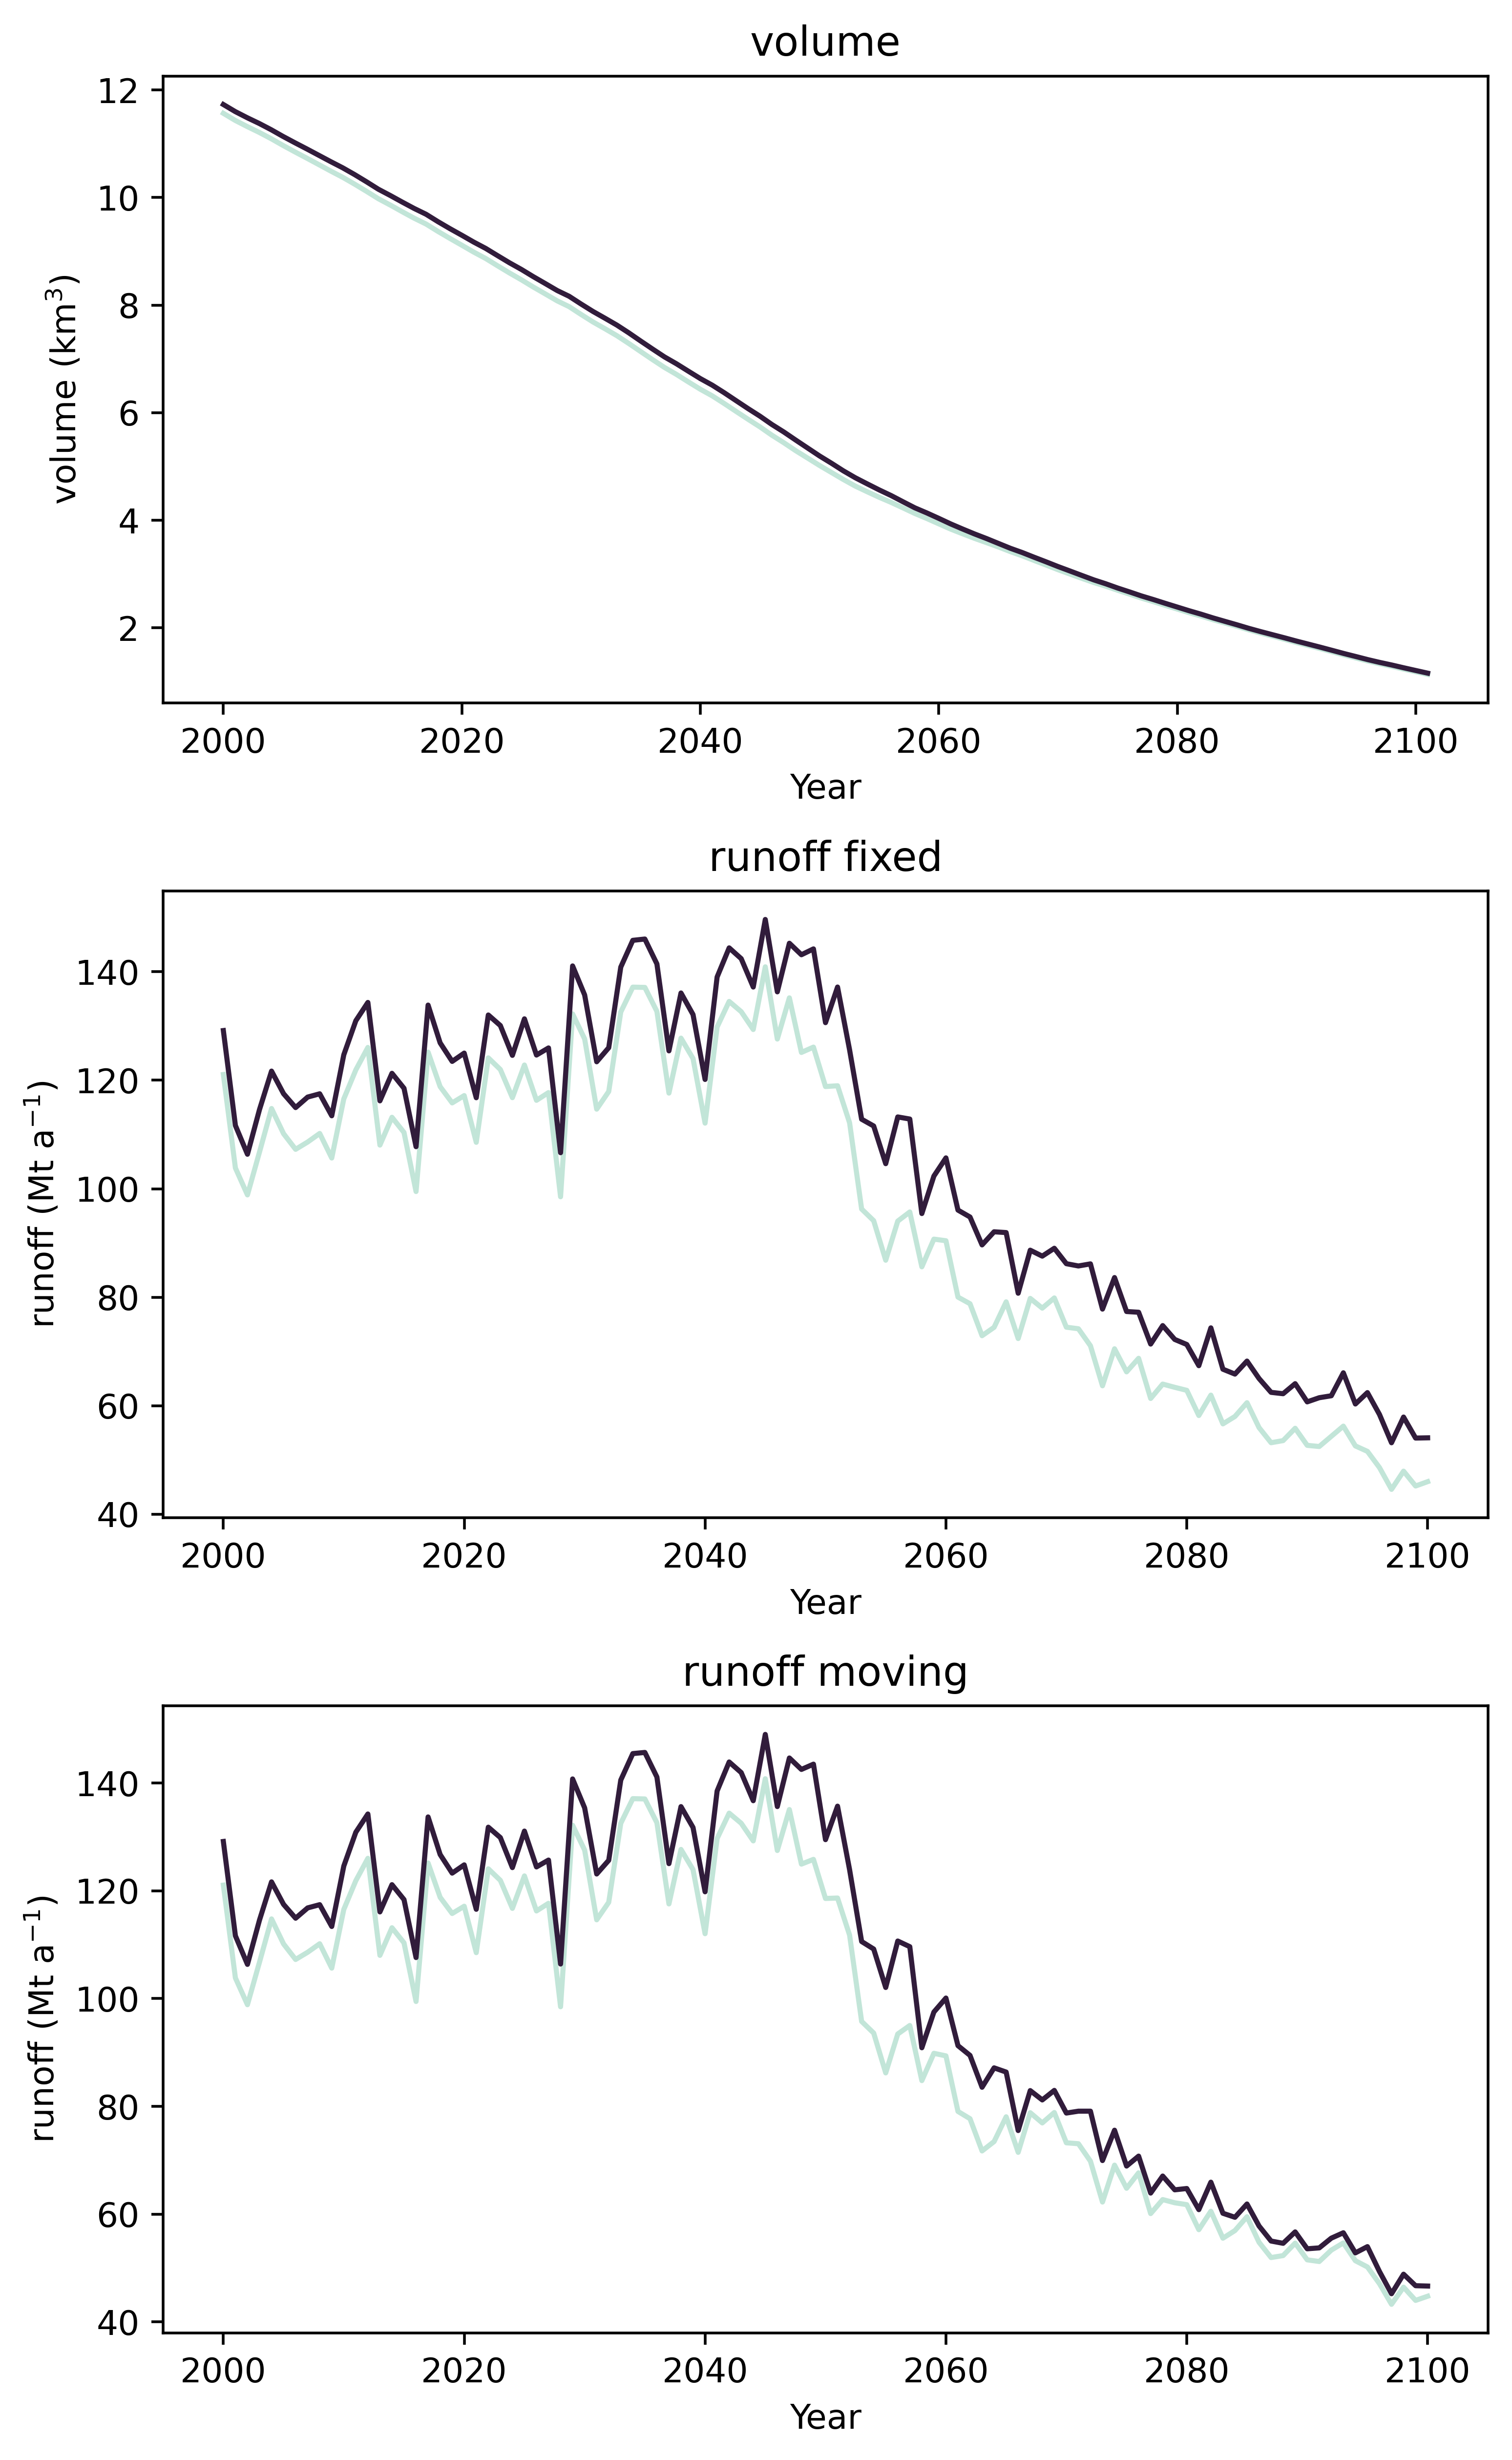

In [ ]:

import xarray as xr
import seaborn as sns
cfg.PARAMS['use_winter_prcp_fac'] = False  # This option is only available for 'GSWP3_W5E5'
cfg.PARAMS['use_temp_bias_from_file'] = False  # This option is only available for 'GSWP3_W5E5'
# cfg.PARAMS['melt_f_min'] = 0.33
# cfg.PARAMS['melt_f_max'] = 33

# setting
Pf_min = 0.1
Pf_max = 0.7
Pf_stride =0.5

file_parent_path = '/home/dcl/OGGM_pre-process_directory/Aletsch glacier ERA5L V2'                      ##################################
rgi_id_for_experiment = 'RGI60-11.01450'  # Alestch    
baseline_climate = 'ERA5L-HMA'


## 作图
fig, axs = plt.subplots(3, 1, figsize=(7, 12), dpi=500)
plt.subplots_adjust(hspace=0.3)

pd_prcp_fac_sens = pd.DataFrame(index=np.arange(Pf_min,Pf_max,Pf_stride))
mbdf= pd.DataFrame(index = np.arange(2000,2020,1))

for j, prcp_fac in enumerate(pd_prcp_fac_sens.index):


    rgi_ids = rgi_id_for_experiment                                                                    
    cfg.PATHS['working_dir'] = utils.mkdir(file_parent_path)   

    prepro_base_url_L2 = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/'
    gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=2, prepro_base_url=prepro_base_url_L2,
                                                                                    reset = True,
                                                                                    force=True,
                                                                                    )

    #----------------------------------------------------------------------------------------------- define the climate data to use
    cfg.PARAMS['baseline_climate'] = baseline_climate

    # add climate data to gdir
    workflow.execute_entity_task(tasks.process_climate_data, gdirs)
    gdir_tri = gdirs[0] ##################################



    
    #----------------------------------------------------------------------------------------------- mb calibration
    cfg.PARAMS['prcp_fac'] = prcp_fac  ## set Pf
    calib_param = workflow.execute_entity_task(tasks.mb_calibration_from_geodetic_mb,
                                            gdir_tri,
                                            ref_period=cfg.PARAMS['geodetic_mb_period'],
                                            calibrate_param1='melt_f',
                                            calibrate_param2='temp_bias',
                                            overwrite_gdir=True,
                                            )
    # get parameters
    h, w = gdir_tri.get_inversion_flowline_hw()    #""" Shortcut function to read the heights and widths of the glacier.
    mb_prcp_fac = massbalance.MonthlyTIModel(gdir_tri)
    mbdf['mod_mb_prcp_fac'] = mb_prcp_fac.get_specific_mb(h, w, year=mbdf.index)
    
    mb_params = gdir_tri.read_json('mb_calib')
    print('-------------------------', 'temp_bias', mb_params['temp_bias'], 'prcp_fac',mb_params['prcp_fac'], 'melt_f',mb_params['melt_f'],'-------------------------')


    #----------------------------------------------------------------------------------------------- Compute apparent mb from an arbitrary mass balance profile.
    workflow.execute_entity_task(tasks.apparent_mb_from_any_mb, gdir_tri)

    # border = 160
    # filter = border >= 20
    # tasks.compute_downstream_line(gdir_tri)
    # tasks.compute_downstream_bedshape(gdir_tri)

    #----------------------------------------------------------------------------------------------- Fit the total volume of the glaciers to the 2019 consensus estimate
    workflow.calibrate_inversion_from_consensus([gdir_tri], apply_fs_on_mismatch=True,ignore_missing=False,
                                                        error_on_mismatch=True,
                                                        filter_inversion_output=True)

    #----------------------------------------------------------------------------------------------- "Merges data from preprocessing tasks. First task after inversion!
    workflow.execute_entity_task(tasks.init_present_time_glacier, [gdir_tri]) #gdirs_sel)


    y0 = gdir_tri.get_climate_info()['baseline_yr_0']
    ye = gdir_tri.get_climate_info()['baseline_yr_1'] + 1  # run really to the end until 1.1.

    # 'static' initialisation
    workflow.execute_entity_task(tasks.run_from_climate_data, gdir_tri,
                                min_ys=y0, ye=ye,
                                fixed_geometry_spinup_yr=1979,  # here you could add a static spinup if you want
                                output_filesuffix='_historical')

    # 'dynamic' initialisation, including dynamic mb calibration
    dynamic_spinup_start_year = 1979
    minimise_for = 'area'  # other option would be 'volume'
    workflow.execute_entity_task(
        tasks.run_dynamic_melt_f_calibration, gdir_tri,
        err_dmdtda_scaling_factor=0.2,  # by default we reduce the mass balance error for accounting for
        # corrleated uncertainties on a regional scale
        ys=dynamic_spinup_start_year, ye=ye,
        kwargs_run_function={'minimise_for': minimise_for},
        ignore_errors=True,
        kwargs_fallback_function={'minimise_for': minimise_for},
        output_filesuffix='_spinup_historical',
    );

    #----------------------------------------------------------------------------------------------- GCM data downscale
    gcms_cmip6 = pd.read_csv('/home/dcl/data/GCMS_list/CMIP6 projection/all_gcm_list.csv', index_col=0)

    ### GCM在本机的数据地址模板
    bt = '/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/{}/{}_{}_r1i1p1f1_tas.nc'
    bp = '/home/dcl/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/{}/{}_{}_r1i1p1f1_pr.nc'

    gcm_list_12total = ['BCC-CSM2-MR',
                        'CESM2',
                        # 'CESM2-WACCM',
                        # 'EC-Earth3',
                        # 'EC-Earth3-Veg',
                        # 'FGOALS-f3-L',
                        # 'GFDL-ESM4',
                        # 'INM-CM4-8',
                        # 'INM-CM5-0',
                        # 'MPI-ESM1-2-HR',
                        # 'MRI-ESM2-0',
                        # 'NorESM2-MM',
                        ]
    # SSP1-2.6, SSP2-4.5, SSP3-7.0, and SSP5-8.5
    scenario_list_4total = ['ssp126',
                            # 'ssp245' ,
                            # 'ssp370', 
                            # 'ssp585'   
                            ]



    for gcm in gcms_cmip6.gcm.unique(): ##TEST:
        # print(gcm+"    no limitation")
        if gcm in gcm_list_12total:
            # print(gcm)
            df1 = gcms_cmip6.loc[gcms_cmip6.gcm == gcm]
            # n1 = n1 +1
            for ssp in df1.ssp.unique():
                if ssp in scenario_list_4total:
                    # print(ssp)
                    df2 = df1.loc[df1.ssp == ssp]
                    assert len(df2) == 2

                    ft = df2.loc[df2['var'] == 'tas'].iloc[0]
                    fp = df2.loc[df2['var'] == 'pr'].iloc[0].path
                    rid = ft.fname.replace('_r1i1p1f1_tas.nc', '')
                    rid='_CMIP6_' + rid
                    ft = ft.path

                    print(bt.format(gcm, gcm, ssp))
                    print(bp.format(gcm, gcm, ssp))
                    
                    # ft = utils.file_downloader(bt.format(gcm, gcm, ssp))
                    # fp = utils.file_downloader(bp.format(gcm, gcm, ssp))
                    # n2 = n2 +1
                                
                    workflow.execute_entity_task(process_cmip_data, gdir_tri, 
                                                    filesuffix=rid,  # recognize the climate file for later
                                                    fpath_temp=bt.format(gcm, gcm, ssp),  # temperature projections
                                                    fpath_precip=bp.format(gcm, gcm, ssp),  # precip projections
                                                    # year_range=('2000', '2019'),

                                                    );
                    
    #----------------------------------------------------------------------------------------------- run projection 
    for GCM in gcm_list_12total:
        for scen in scenario_list_4total:
            
            rid = '_CMIP6_{}_{}'.format(GCM, scen)
            print(rid + 'start')

            try:  # check if (GCM, scen) combination exists
                workflow.execute_entity_task(tasks.run_with_hydro, gdir_tri,
                                            run_task=tasks.run_from_climate_data,
                                            climate_filename='gcm_data',  # use gcm_data, not climate_historical
                                            climate_input_filesuffix=rid,  # use the chosen GCM and scenario
                                            output_filesuffix=rid,  # the filesuffix of the resulting file, so we can find it later
                                            store_monthly_hydro=True,
                                            ref_area_yr = 2000,
                                            ys=2000,  # star year of our projection runs
                                            init_model_yr=2000, # the year of the initial run you want to start from. The default is to take the last year of the simulation.
                                            # fixed_geometry_spinup_yr=1979, 
                                            ref_geometry_filesuffix='_spinup_historical',
                                            init_model_filesuffix='_spinup_historical',  # this is important! Start from 2020 glacier
                                            );
                print(rid + 'end')
            except FileNotFoundError:
                # if a certain scenario is not available for a GCM we land here
                # and we inidcate this by printing a message so the user knows
                # this scenario is missing
                # (in this case of course, the file actually is available, but we just pretend that it is not...)
                print('No ' + GCM +' run with scenario ' + scen + ' available!')





    #----------------------------------------------------------------------------------------------- compile output

    ds_all = []  # in this array all datasets going to be stored with additional coordinates GCM and SCENARIO
    creation_date = strftime("%Y-%m-%d %H:%M:%S", gmtime())  # here add the current time for info

    for GCM in gcm_list_12total:  # loop through all GCMs
        for scen in scenario_list_4total:  # loop through all SSPs
            try:  # check if GCM, SCENARIO combination exists
                # rid = '_{}_{}'.format(GCM, scen)  # put together the same filesuffix which was used during the projection runs
                rid = '_CMIP6_{}_{}'.format(GCM, scen)

                ds_tmp = utils.compile_run_output(gdir_tri, input_filesuffix=rid)  # open one model run
                # utils.compile_run_output(gdirs, input_filesuffix=rid)  # open one model run

                ############    直接用这个ds_tmp = utils.compile_run_output(gdirs, input_filesuffix=rid) ，发现ds_tmp为空
                file_path = file_parent_path + '/run_output'+ rid +'.nc'
                ds_tmp = xr.open_dataset(file_path)
                ############


                ds_tmp.coords['GCM'] = GCM  # add GCM as a coordinate
                ds_tmp.coords['GCM'].attrs['description'] = 'used Global circulation Model'  # add a description for GCM
                ds_tmp = ds_tmp.expand_dims("GCM")  # add GCM as a dimension to all Data variables

                ds_tmp.coords['SCENARIO'] = scen  # add scenario (here ssp) as a coordinate
                ds_tmp.coords['SCENARIO'].attrs['description'] = 'used scenario (here SSPs)'
                ds_tmp = ds_tmp.expand_dims("SCENARIO")  # add SSO as a dimension to all Data variables

                ds_tmp.attrs['creation_date'] = creation_date  # also add todays date for info
                ds_all.append(ds_tmp)  # add the dataset with extra coordinates to our final ds_all array

            except RuntimeError as err:  # here we land if an error occured
                if str(err) == 'Found no valid glaciers!':  # This is the error message if the GCM, SCENARIO (here ssp) combination does not exist
                    print(f'No data for GCM {GCM} with SCENARIO {scen} found!')  # print a descriptive message
                else:
                    raise RuntimeError(err)  # if an other error occured we just raise it

    ds_merged = xr.combine_by_coords(ds_all, fill_value=np.nan)  # define how the missing GCM, SCENARIO combinations should be filled
    # ds_merged.to_netcdf(file_parent_path + '/merged_GCM_projections.nc')




    df_volume = annual_variable_calculation_EXvolume(ds_merged, 'volume')
    df_runoff = annual_variable_calculation_runoff(ds_merged)


    col_pf = sns.cubehelix_palette(start=.5, rot=-.5, n_colors=len(pd_prcp_fac_sens.index))


    ## volume
    axs[0].plot(df_volume[('ssp126','volume_medianGCMs')] * 1e-9, label = f'prcp_fac={np.round(prcp_fac,1)}', color=col_pf[j] )
    axs[0].set_title('volume')  # 设置第一个子图的标题
    axs[0].set_xlabel('Year')  # 设置第一个子图的x轴标题
    axs[0].set_ylabel('volume (km$^3$)') 

    ## runoff_FixedGaugeStation
    axs[1].plot(df_runoff[('ssp126','runoff_mergeRGI_FixedGaugeStation_medianGCMs')] * 1e-9, label = f'prcp_fac={np.round(prcp_fac,1)}', color=col_pf[j] )
    axs[1].set_title('runoff fixed')  # 设置第二个子图的标题
    axs[1].set_xlabel('Year')  # 设置第二个子图的x轴标题
    axs[1].set_ylabel('runoff (Mt a$^{-1}$)') 


    ## runoff_MovingGaugeStation
    axs[2].plot( df_runoff[('ssp126','runoff_mergeRGI_MovingGaugeStation_medianGCMs')] * 1e-9, label = f'prcp_fac={np.round(prcp_fac,1)}', color=col_pf[j] )
    axs[2].set_title('runoff moving')  # 设置第三个子图的标题
    axs[2].set_xlabel('Year')  # 设置第三个子图的x轴标题
    axs[2].set_ylabel('runoff (Mt a$^{-1}$)')

    # plt.show()






In [ ]:
## get monthly mb

from oggm.utils import weighted_average_1d
from oggm.cfg import SEC_IN_MONTH

# get parameters
heights, widths = gdir_tri.get_inversion_flowline_hw()    #""" Shortcut function to read the heights and widths of the glacier.
mb_prcp_fac = massbalance.MonthlyTIModel(gdir_tri)
mbdf['mod_mb_prcp_fac'] = mb_prcp_fac.get_specific_mb(h, w, year=mbdf.index)

# for year in range(1980, 2019):
#     for month in range(1, 13):
for year in [2008]:
    for month in [1]:
        # print(year,month)
        monthly_mbs = mb_prcp_fac.get_monthly_mb(heights, year=year + month / 12)
        monthly_specific_mb = weighted_average_1d(monthly_mbs, widths) * SEC_IN_MONTH * mb_prcp_fac.rho

# mb_params = gdir_t
# ri.read_json('mb_calib')
# print('-------------------------', 'temp_bias', mb_params['temp_bias'], 'prcp_fac',mb_params['prcp_fac'], 'melt_f',mb_params['melt_f'],'-------------------------')
